In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [11]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# Encode Gender
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Select features and scale them
features = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

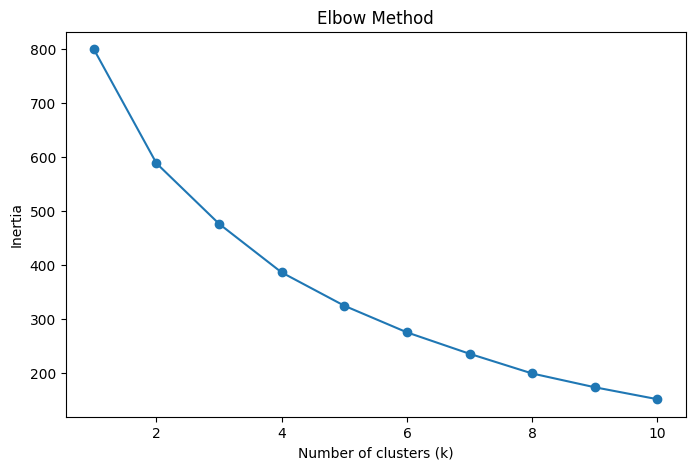

In [13]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [14]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [15]:
# Reverse scaling for interpretation
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_profiles = pd.DataFrame(cluster_centers, columns=features.columns)
cluster_profiles['Gender'] = cluster_profiles['Gender'].round().map({0: 'Male', 1: 'Female'})

cluster_profiles

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,28.345455,60.800000,68.654545
1,Female,28.250000,62.000000,71.675000
2,Male,48.720930,46.186047,39.674419
3,Female,55.903226,48.774194,38.806452
4,Female,40.419355,90.000000,15.741935


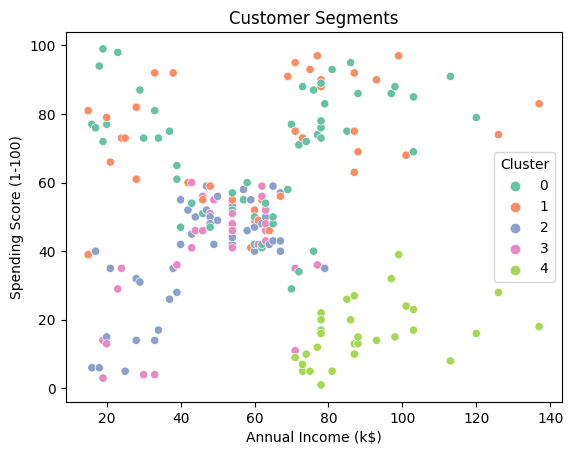

In [16]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2')
plt.title('Customer Segments')
plt.show()